In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_samples=1000,n_features=5,n_informative=4,n_clusters_per_class=1,n_redundant=0)

In [3]:
df = pd.DataFrame(X,columns = ["col1","col2","col3","col4","col5"])
df["target"] = y
df.head()

,col1,col2,col3,col4,col5,target
0,2.706192,-0.468658,-2.633426,0.597386,-0.389683,0
1,-0.191389,-1.233384,1.234709,-1.870725,0.971901,1
2,1.411453,2.024637,0.349196,0.707336,1.522075,0
3,1.236862,1.166492,-0.836637,1.983147,0.505078,0
4,3.116953,-1.742257,-1.241371,-0.611006,1.520586,1


In [4]:
#function for row sampling 
def row_sample(percent,df,replacement):
    if replacement:
        return df.sample(int(df.shape[0]*percent),replace = True)
    else:
        return df.sample(int(df.shape[1]*percent),replace = False)

In [5]:
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [7]:
df1 = row_sample(0.1,df,1)
df1.shape

(100, 6)

In [9]:
df2 = row_sample(0.1,df,1)
df2.shape

(100, 6)

In [8]:
df3 = row_sample(0.1,df,1)
df3.shape


(100, 6)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [14]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'x[1] <= -0.073\ngini = 0.487\nsamples = 100\nvalue = [42, 58]'),
 Text(0.25, 0.5, 'x[2] <= -1.927\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.75, 0.5, 'x[2] <= 2.192\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

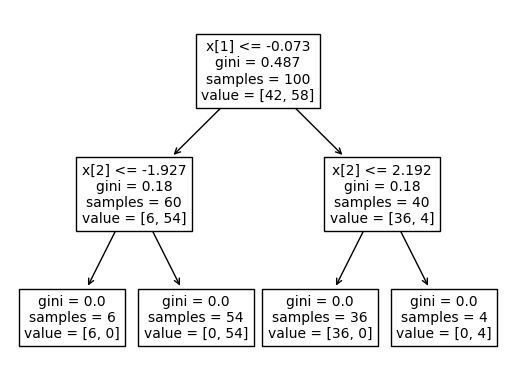

In [17]:
plot_tree(clf1)

In [24]:
sample1 = sample_features(df,0.8)
sample1.head()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_4668\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col4,col2,col3,target
0,2.706192,0.597386,-0.468658,-2.633426,0
1,-0.191389,-1.870725,-1.233384,1.234709,1
2,1.411453,0.707336,2.024637,0.349196,0
3,1.236862,1.983147,1.166492,-0.836637,0
4,3.116953,-0.611006,-1.742257,-1.241371,1


In [27]:
sample2 = sample_features(df,0.8)
sample2.head()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_4668\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col4,col2,col5,target
0,2.706192,0.597386,-0.468658,-0.389683,0
1,-0.191389,-1.870725,-1.233384,0.971901,1
2,1.411453,0.707336,2.024637,1.522075,0
3,1.236862,1.983147,1.166492,0.505078,0
4,3.116953,-0.611006,-1.742257,1.520586,1


In [28]:
sample3 = sample_features(df,0.8)
sample3.head()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_4668\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col3,col5,col4,target
0,2.706192,-2.633426,-0.389683,0.597386,0
1,-0.191389,1.234709,0.971901,-1.870725,1
2,1.411453,0.349196,1.522075,0.707336,0
3,1.236862,-0.836637,0.505078,1.983147,0
4,3.116953,-1.241371,1.520586,-0.611006,1


In [36]:
clf1.fit(sample1.iloc[:,0:4],sample1.iloc[:,-1])
clf2.fit(sample2.iloc[:,0:4],sample2.iloc[:,-1])
clf3.fit(sample3.iloc[:,0:4],sample3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5231481481481481, 0.9375, 'x[2] <= -0.218\ngini = 0.5\nsamples = 1000\nvalue = [504, 496]'),
 Text(0.21296296296296297, 0.8125, 'x[3] <= -1.791\ngini = 0.25\nsamples = 518\nvalue = [76, 442]'),
 Text(0.1111111111111111, 0.6875, 'x[2] <= -1.788\ngini = 0.027\nsamples = 73\nvalue = [72, 1]'),
 Text(0.07407407407407407, 0.5625, 'x[0] <= 2.778\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.037037037037037035, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1111111111111111, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.5625, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(0.3148148148148148, 0.6875, 'x[2] <= -2.443\ngini = 0.018\nsamples = 445\nvalue = [4, 441]'),
 Text(0.2222222222222222, 0.5625, 'x[2] <= -2.476\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18518518518518517, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25925925925925924, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4074

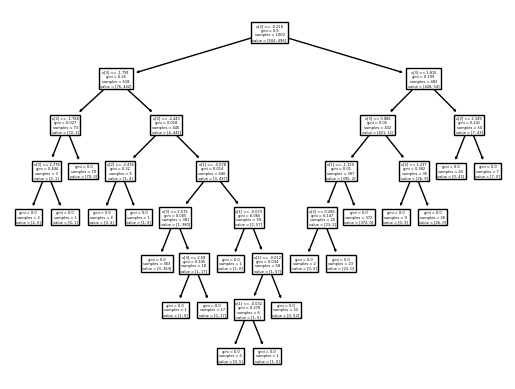

In [37]:
plot_tree(clf1)

In [38]:
clf1.predict(np.array([-0.191389,1.234709,0.971901,-1.870725]).reshape(1,4))

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [45]:
def combined_sampling(df,percent_row,percent_col):
    new_df = row_sample(percent_row,df,1)
    return sample_features(new_df,percent_col)

In [46]:
df1 = combined_sampling(df,0.2,0.8)
df1.head()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_4668\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col3,col5,col2,target
974,-0.061705,-0.322623,0.371050,1.711244,0
437,0.940184,-1.112658,0.366993,0.809126,0
863,0.551787,-1.276941,0.699600,0.747455,0
488,1.427313,-0.666111,-1.290881,1.132699,0
551,-0.255693,-3.160897,-0.963513,-0.560238,0
